# Equator Weather Analysis
1.  The only effect latitude has on weather is the temperature.  In this analysis, we only looked at the max temperature for each city.  As seen on the graph "Latitude vs Max Temperature", the temperature rises as it draws nearer to the equator.  Further analysis could be done by taking the minimum temperature for the day into consideration.
2.  When looking at the effect of latitude on cloudiness, it seems that there is no real correlation.  The city plots, as shown in the scatterplot, are all over the graph. 
3.  When looking at the effect of latitude on Humidity and Wind Speeds, there is no correlation.  Humidity for most of the cities populate the graph between 80 to 100.  Wind speeds for most of the cities end up between 0 to 15, with a few outliers.  

Analyzing the relationship between longitude against wind speeds, humidity, and cloudiness may yield better results and may draw out better conclusions.  As far as the effect of the latitude to weather, only the max temperature is affected.

In [1]:
#Import Dependencies
from citipy import citipy
import openweathermapy as owm
import requests
import random
import json
import numpy as np
import pandas as pd
from config import api_key
import matplotlib.pyplot as plt

# Pseudocodes
1.  import dependencies, modules, etc
2.  generate cities list
    a. generate random latitude and longitude, then put them in a list
    b. get the nearest city based on latitude and longitude using cipy
    c. do an else if statement so that cities do not duplicate
3.  perform the API calls
    a. create a parameter dictionary:  location(lat, lon), gkey
4.  create a dataframe that has: City name, Latitutde, Longitude, Humidity, Cloudiness, Wind Speed, Max Temperature
    a. create csv file
    b. create additional columns that holds allt he information
    c. use iterrows() to generate the random data into the columns
5.  Plot the different scatter plots:
    a. Temperature vs Latitude
    b. Humidity vs Latitude
    c. Cloudiness vs Latitude
    d. Wind Speed vs Latitude
6.  Save the images into a png
7.  Save the dataframe into a CSV file

# Generate Cities

In [2]:
#create random latitude and longitude
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#pair them up into a zip
coordinates = zip(lats, lngs)

In [3]:
#Use Citipy to find the nearest city in each pair
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [4]:
#find the city name associated with each pair and put them in a list
city_name = []
for city in cities:
    name = city.city_name
    #code to avoid duplicates in the list
    if name not in city_name:
        city_name.append(name)

# Create a DataFrame

In [5]:
#create a dataframe of the cities
cities_df = pd.DataFrame({"City": city_name})

#create empty columns to iterate over later
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Max Temp"] = ""
cities_df["Min Temp"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lon,Humidity,Cloudiness,Wind Speed,Max Temp,Min Temp,Country,Date
0,rikitea,,,,,,,,,
1,ushuaia,,,,,,,,,
2,butaritari,,,,,,,,,
3,bambanglipuro,,,,,,,,,
4,kaitangata,,,,,,,,,


In [6]:
#test to see if there is more than 500 cities in the list
len(cities_df["City"])

574

# Test code for 1 city

In [7]:
#Test run before running the for loop code for the 500+ cities
units = "Imperial"
city = "Tuktoyaktuk"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city).json()

In [8]:
#look at the json and see if all the data needed is available
response

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.44, 'lon': -133.03},
 'dt': 1527804000,
 'id': 6170031,
 'main': {'humidity': 86,
  'pressure': 1011,
  'temp': 50.85,
  'temp_max': 59,
  'temp_min': 37.4},
 'name': 'Tuktoyaktuk',
 'sys': {'country': 'CA',
  'id': 3555,
  'message': 0.0037,
  'sunrise': 0,
  'sunset': 0,
  'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 3.36}}

In [9]:
#print out the test results
lat = response["coord"]["lat"]
lon = response["coord"]["lon"]
print(lat, lon)
humidity = response["main"]["humidity"]
cloudiness = response["clouds"]["all"]
wind_speed = response["wind"]["speed"]
max_temp = response["main"]["temp_max"]
min_temp = response["main"]["temp_min"]
print(humidity, cloudiness, wind_speed)
print(min_temp, max_temp)
country = response["sys"]["country"]
date = response["dt"]
print(country, date)

69.44 -133.03
86 75 3.36
37.4 59
CA 1527804000


# Perform the API Calls

In [10]:
#perform the api calls, then store all the data in a database
units = "Imperial"
row_count = 0

#loop through the cities and run a lat/lon search for each city
for index, row in cities_df.iterrows():
    
    #update the parameters with City in each loop
    city = row["City"]
    
    #create the base and the query url
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    
    #print and add 1 to the city count
    print(f"Now retrieving weather data for city #{row_count}")
    row_count += 1
    
    #print out the API request for each city
    city_weather = requests.get(query_url + city)
    print(city_weather.url)
    
    #translates the data into json to gather data
    city_weather = city_weather.json()
    
    #find the data
    try:
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_windspeed = city_weather["wind"]["speed"]
        city_maxtemp = city_weather["main"]["temp_max"]
        city_mintemp = city_weather["main"]["temp_min"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #put the data into the dataframe
        cities_df.loc[index, "Lat"] = city_lat
        cities_df.loc[index, "Lon"] = city_lon
        cities_df.loc[index, "Humidity"] = city_humidity
        cities_df.loc[index, "Cloudiness"] = city_cloudiness
        cities_df.loc[index, "Wind Speed"] = city_windspeed
        cities_df.loc[index, "Max Temp"] = city_maxtemp
        cities_df.loc[index, "Min Temp"] = city_mintemp
        cities_df.loc[index, "Country"] = city_country
        cities_df.loc[index, "Date"] = city_date
        
        #lets the code run if there are missing data and drops the city from the dataframe
    except:
        print("Error with city data.  Dropping row and skipping")
        cities_df.drop(labels=index, inplace=True)

Now retrieving weather data for city #0
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=rikitea
Now retrieving weather data for city #1
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=ushuaia
Now retrieving weather data for city #2
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=butaritari
Now retrieving weather data for city #3
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=bambanglipuro
Now retrieving weather data for city #4
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kaitangata
Now retrieving weather data for city #5
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=saint-philippe
Now retrieving weather data for city #6
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=sitka
Now retrieving weather data for city #52
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=derzhavinsk
Now retrieving weather data for city #53
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=bambous%20virieux
Now retrieving weather data for city #54
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=severo-kurilsk
Now retrieving weather data for city #55
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=lambarene
Now retrieving weather data for city #56
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=tumannyy
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #57
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=pisco
Now retrieving weather data for city #103
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=raga
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #104
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=eureka
Now retrieving weather data for city #105
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=samarai
Now retrieving weather data for city #106
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=ayan
Now retrieving weather data for city #107
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=serafimovich
Now retrieving weather data for city #108
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=lima
Now retrieving weather data for city #153
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=upernavik
Now retrieving weather data for city #154
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=olafsvik
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #155
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=coquimbo
Now retrieving weather data for city #156
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=mabaruma
Now retrieving weather data for city #157
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=lebu
Now retrieving weather data for city #158
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=varhaug
Now retrieving weather data for city #205
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=tazovskiy
Now retrieving weather data for city #206
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=mae%20hong%20son
Now retrieving weather data for city #207
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=lanxi
Now retrieving weather data for city #208
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=nanortalik
Now retrieving weather data for city #209
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=port%20augusta
Now retrieving weather data for city #210
http://api.openweathermap.org/data/2.5/weather?appid=4284461746

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=lagoa
Now retrieving weather data for city #256
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=faya
Now retrieving weather data for city #257
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=matagami
Now retrieving weather data for city #258
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=karratha
Now retrieving weather data for city #259
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kieta
Now retrieving weather data for city #260
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=duluth
Now retrieving weather data for city #261
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&un

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kemijarvi
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #309
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=jabinyanah
Now retrieving weather data for city #310
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=ust-nera
Now retrieving weather data for city #311
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=yar-sale
Now retrieving weather data for city #312
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=maniitsoq
Now retrieving weather data for city #313
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=pauini
Now retrieving weather data for city #314
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=bichena
Now retrieving weather data for city #361
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=ukwa
Now retrieving weather data for city #362
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kachiry
Now retrieving weather data for city #363
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=atchison
Now retrieving weather data for city #364
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=uyemskiy
Now retrieving weather data for city #365
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=taoudenni
Now retrieving weather data for city #366
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=pacific%20grove
Now retrieving weather data for city #414
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=ranir%20bazar
Now retrieving weather data for city #415
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=krutaya%20gorka
Now retrieving weather data for city #416
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=iwanai
Now retrieving weather data for city #417
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=hamilton
Now retrieving weather data for city #418
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kedgwick
Now retrieving weather data for city #419
http://api.openweathermap.org/data/2.5/weather?appid=428446

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=tinqueux
Now retrieving weather data for city #466
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=notodden
Now retrieving weather data for city #467
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=cap-aux-meules
Now retrieving weather data for city #468
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=pringsewu
Now retrieving weather data for city #469
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=mandalgovi
Now retrieving weather data for city #470
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=palabuhanratu
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #471
http://api.op

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=rudnaya%20pristan
Now retrieving weather data for city #517
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=maslovskiy
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #518
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=matai
Now retrieving weather data for city #519
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=koronowo
Now retrieving weather data for city #520
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=maraa
Now retrieving weather data for city #521
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=tamandare
Now retrieving weather data for city #522
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=aswan
Now retrieving weather data for city #568
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=green%20river
Now retrieving weather data for city #569
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=kindu
Now retrieving weather data for city #570
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=fevralsk
Error with city data.  Dropping row and skipping
Now retrieving weather data for city #571
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=nur
Now retrieving weather data for city #572
http://api.openweathermap.org/data/2.5/weather?appid=428446174655c4f13b381ad1fa6a6658&units=Imperial&q=guira%20de%20melena
Now retrieving weather data for city #573
http://api.openweather

In [11]:
#reorganize the columns 
cities_df = cities_df[["City", "Country", "Date", "Lat", "Lon", "Humidity", "Cloudiness", "Wind Speed", "Max Temp", "Min Temp"]]
cities_df

,City,Country,Date,Lat,Lon,Humidity,Cloudiness,Wind Speed,Max Temp,Min Temp
0,rikitea,PF,1527808211,-23.12,-134.97,100,0,3.6,76.1,76.1
1,ushuaia,AR,1527804000,-54.81,-68.31,70,20,31.09,42.8,42.8
2,butaritari,KI,1527808212,3.07,172.79,100,68,14.56,82.31,82.31
3,bambanglipuro,ID,1527808212,-7.95,110.28,94,0,2.37,67.82,67.82
4,kaitangata,NZ,1527808212,-46.28,169.85,75,0,4.38,40.91,40.91
5,saint-philippe,CA,1527807300,45.36,-73.48,65,90,10.29,78.8,75.2
6,longyearbyen,NO,1527807000,78.22,15.63,98,75,4.7,37.4,37.4
7,albany,US,1527807240,42.65,-73.75,73,90,13.87,73.4,73.4
8,hovd,NO,1527807000,63.83,10.7,62,20,6.93,59,57.2
9,shush,RU,1527808213,55.6,89.45,71,68,14.79,48.92,48.92


In [12]:
#saves the dataframe into a csv file
cities_df.to_csv("output_analysis/city_weather.csv", 
                encoding="utf-8", index=False)

# Latitude vs Max Temperature

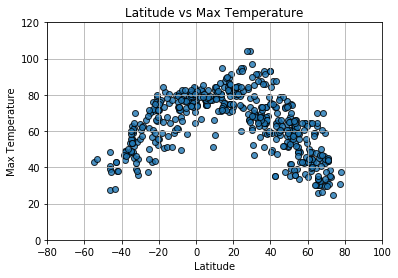

In [13]:
plt.scatter(cities_df["Lat"],
            cities_df["Max Temp"],
            edgecolor="black",
            linewidths=1,
            alpha=0.8)
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(0, 120)
plt.savefig("output_analysis/latitude_maxtemp.png")
plt.show()

# Latitude vs Humidity

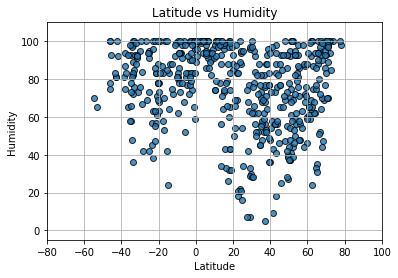

In [14]:
plt.scatter(cities_df["Lat"],
            cities_df["Humidity"],
            edgecolor="black",
            linewidths=1,
            alpha=0.8)
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-5, 110)
plt.savefig("output_analysis/latitude_humidity.png")
plt.show()

# Latitude vs Cloudiness

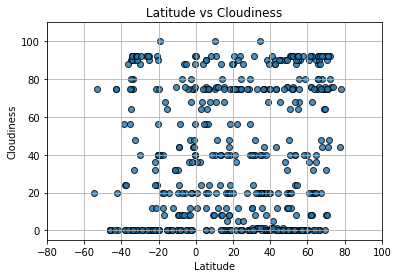

In [15]:
plt.scatter(cities_df["Lat"],
            cities_df["Cloudiness"],
            edgecolor="black",
            linewidths=1,
            alpha=0.8)
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-5, 110)
plt.savefig("output_analysis/latitude_cloudiness.png")
plt.show()

# Latitude vs Wind Speed

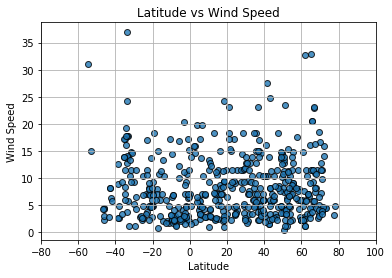

In [16]:
plt.scatter(cities_df["Lat"],
            cities_df["Wind Speed"],
            edgecolor="black",
            linewidths=1,
            alpha=0.8)
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.savefig("output_analysis/latitue_windspeed.png")
plt.show()